## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
"""Code Here
設定超參數
"""
from keras.layers import BatchNormalization

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

monitors = ["val_loss","Validation Accuracy"]
patiences = [5,10,25]

In [11]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_loss", 
                          patience=5, 
                          verbose=1)

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for monitor in monitors:
    for patience in patiences:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        
        earlystop = EarlyStopping(monitor=monitor, 
                                  patience=patience, 
                                  verbose=1)
        print("Using monitor: ", monitor, ", Experiment Patience with = %.1f" % (patience))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True,
                  callbacks=[earlystop]
                  )
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        name_tag = "%s with %.1f" % (monitor,patience)
        results[name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Using monitor:  val_loss , Experiment Patience with = 5.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 8s 157us/step - loss: 1.2380 - acc: 0.5713 - val_loss: 1.4765 - val_acc: 0.4793
Epoch 14/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.2114 - acc: 0.5814 - val_loss: 1.4653 - val_acc: 0.4858
Epoch 15/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.1872 - acc: 0.5909 - val_loss: 1.4638 - val_acc: 0.4892
Epoch 16/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.1630 - acc: 0.6001 - val_loss: 1.4671 - val_acc: 0.4831
Epoch 17/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.1405 - acc: 0.6067 - val_loss: 1.4685 - val_acc: 0.4848
Epoch 18/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.1183 - acc: 0.6158 - val_loss: 1.4573 - val_acc: 0.4932
Epoch 19/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.0964 - acc: 0.6247 - val_loss: 1.4552 - val_acc: 0.4943
Epoch 20/50
50000/50000 [=============

Epoch 27/50
50000/50000 [==============================] - 10s 202us/step - loss: 0.9289 - acc: 0.6894 - val_loss: 1.4658 - val_acc: 0.4898
Epoch 28/50
50000/50000 [==============================] - 9s 175us/step - loss: 0.9089 - acc: 0.6988 - val_loss: 1.4809 - val_acc: 0.4930
Epoch 29/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.8874 - acc: 0.7055 - val_loss: 1.4811 - val_acc: 0.4935
Epoch 30/50
50000/50000 [==============================] - 10s 205us/step - loss: 0.8692 - acc: 0.7142 - val_loss: 1.4812 - val_acc: 0.4979
Epoch 31/50
50000/50000 [==============================] - 10s 190us/step - loss: 0.8497 - acc: 0.7202 - val_loss: 1.4981 - val_acc: 0.4915
Epoch 32/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.8281 - acc: 0.7302 - val_loss: 1.4931 - val_acc: 0.4948
Epoch 33/50
50000/50000 [==============================] - 8s 157us/step - loss: 0.8086 - acc: 0.7377 - val_loss: 1.5079 - val_acc: 0.4897
Epoch 34/50
50000/50000 

C:\Users\KenChen\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `Validation Accuracy` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 8s 159us/step - loss: 1.7564 - acc: 0.3897 - val_loss: 1.8405 - val_acc: 0.3744
Epoch 3/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.6237 - acc: 0.4351 - val_loss: 1.7060 - val_acc: 0.4065
Epoch 4/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5518 - acc: 0.4591 - val_loss: 1.6382 - val_acc: 0.4252
Epoch 5/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.4943 - acc: 0.4792 - val_loss: 1.5984 - val_acc: 0.4383
Epoch 6/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.4505 - acc: 0.4937 - val_loss: 1.5737 - val_acc: 0.4482
Epoch 7/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.4106 - acc: 0.5096 - val_loss: 1.5672 - val_acc: 0.4504
Epoch 8/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.3756 - acc: 0.5223 - val_loss: 1.5378 - val_acc: 0.4564
Epoch 9/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.2001 - acc: 0.2737 - val_loss: 2.1269 - val_acc: 0.3259
Epoch 2/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.7467 - acc: 0.3912 - val_loss: 1.8123 - val_acc: 0.3870
Epoch 3/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.6240 - acc: 0.4319 - val_loss: 1.6876 - val_acc: 0.4165
Epoch 4/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.5531 - acc: 0.4561 - val_loss: 1.6343 - val_acc: 0.4309
Epoch 5/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.4983 - acc: 0.4753 - val_loss: 1.5963 - val_acc: 0.4451
Epoch 6/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.4536 - acc: 0.4937 - val_loss: 1.5692 - val_acc: 0.4487
Epoch 7/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.4146 - acc: 0.5050 - val_loss: 1.55

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 169us/step - loss: 2.2027 - acc: 0.2709 - val_loss: 2.1419 - val_acc: 0.3053
Epoch 2/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.7413 - acc: 0.3891 - val_loss: 1.7996 - val_acc: 0.3740
Epoch 3/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.6190 - acc: 0.4330 - val_loss: 1.7111 - val_acc: 0.4021
Epoch 4/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.5481 - acc: 0.4571 - val_loss: 1.6156 - val_acc: 0.4362
Epoch 5/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.4950 - acc: 0.4753 - val_loss: 1.5870 - val_acc: 0.4441
Epoch 6/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.4506 - acc: 0.4921 - val_loss: 1.5672 - val_acc: 0.4511
Epoch 7/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.4110 - acc: 0.5054 - val_loss: 1.5505 - 

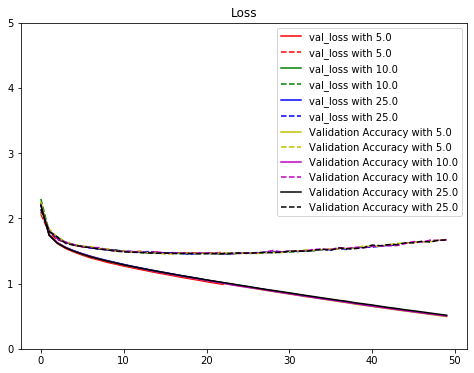

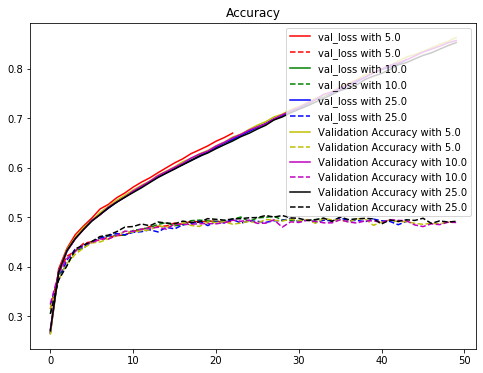

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()